In [ ]:
%%html
<center><marquee style='width: 60%; color: blue;'><b>✌ ¡Hola a todos! Hoy es una clase importante ✌ </b></marquee><center>

<table>
        <td>
        <td><img src="https://educacioncontinua.anahuac.mx/cdn/shop/files/Logo_CentrodeEducacionContinua-01_300x300.png?v=1727301783" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Conceptos de Machine Learning  </p> Clasificación   </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Diplomado </p></tp>
            <tp><p style="font-size:115%;text-align:center"> 2025-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>



# <FONT SIZE=4 COLOR="purple"> 1. Conceptos básicos de Machine Learning </FONT>

En está sección revisaremos algunos conceptos básicos de machine learning.

<FONT SIZE=3 COLOR="green"> a. Algoritmos de clasificación: </FONT>  técnicas de aprendizaje supervisado para hacer predicciones sobre una variable objetivo $\mathbf{y}$ que es categórica o discreta con pocos valores.


<center><FONT SIZE=4 COLOR="BLUE">Situación 1 </FONT></center>
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/cfeb35426442b67197c5ac65e53d8f8c920bc40d/Diplomado/energia1.jpg?raw=true" alt="centered image" width="700" height="300"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

<center><FONT SIZE=4 COLOR="BLUE">Situación 2 </FONT></center>
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/d6bb35cb0a6e29c3995fa8a88c83ec24cf2bc6e8/SVM/svm5.png?raw=true" alt="centered image" width="700" height="300"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>



<FONT SIZE=3 COLOR="green"> b. Variable Objetivo: </FONT> también denominada **variable de respuesta**. En un algoritmo de aprendizaje de máquina supervisado, es la variable que queremos predecir (por lo general, denotada como $\mathbf{y}$). Esta puede ser discreta o continua. En el primer caso, da lugar a algoritmos de ***clasificación*** y en el segundo caso a algoritmos de ***regresión***.

<br>

<FONT SIZE=3 COLOR="green"> c. Variable(s) Predictora(s): </FONT> también denominada ***features*** o características, son las variables que se usarán para predecir la variable objetivo. Estas se denotan como

$$\mathbf{X}=\{X_1,X_2, \dots, X_n \}$$

<br>

<FONT SIZE=3 COLOR="green"> d. Conjunto de Entrenamiento: </FONT> es el subconjunto de registros que se selecciona para entrenar el modelo. Este conjunto consta de dos partes:

- $X_{train}$ : conjunto de entrenamiento de los predictores o *features*.

- $y_{train}$: conjunto de entrenamiento de la variable objetivo asociada al conjunto $X_{train}$.

El conjunto de entrenamiento se selecciona de manera aleatoria y por lo general se toma el $70\%$ , $75\%$ y $80 \%$.

<br>

<FONT SIZE=3 COLOR="green"> e. Conjunto de Prueba: </FONT>: Es el subconjunto de registros que se selecciona para validar el modelo. Consta de dos partes:

- $X_{test}$ : conjunto de validación de los predictores o *features*.

- $y_{test}$: conjunto de validación de la variable objetivo asociada al conjunto $X_{test}$.

El tamaño de este conjunto es el complemento del conjunto de entrenamiento.

**Nota:** para algoritmos clásicos de machine learning se acostumbra dividir en entrenamiento y prueba. Sin embargo, en algoritmos más complejos que requieren el entrenamiento de mucho parámetros, como es el caso de las redes neuronales, se acostumbra dividir en tres partes: *train* , *validation* and *test*.

<center><FONT SIZE=4 COLOR="BLUE"> ESQUEMA GENERAL DE CLASIFICACIÓN EN MACHINE LEARNING </FONT></center>
<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/ESQUEMA%20DE%20CLASIFICACI%C3%93N.png?raw=true" alt="centered image" width="700" height="400"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia  </FONT> <figcaption></center>
<br>

<br>

<FONT SIZE=3 COLOR="green"> f. Matriz de Confusión:</FONT> Herramienta usada para evaluar el rendimiento del modelo. (se ampliará más adelante las métricas y conceptos).

<br>

<FONT SIZE=3 COLOR="green"> g. Hiperparámetro: </FONT> son variables de configuración externa al modelo original (general) que se pueden ajustar para entrenar el modelo. (cada modelo tiene diferentes hiperparámetros)

# <FONT SIZE=4 COLOR="purple"> 2. Ejemplo Práctico </FONT>

- En esta sección haremos un ejemplo práctico.

- Iniciaremos indicando las librerías que debemos usar.

## <FONT SIZE=4 COLOR="blue"> 2.1 Librerías de trabajo </FONT>

In [3]:
# Manipulación de data.frames
import pandas       as pd
import numpy        as np

# Librerías para Gráficos
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento/escalar los datos
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# modelos de clasificación
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier

# Métricas de evaluación
from sklearn                    import metrics
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from imblearn.metrics           import specificity_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 2.2 Contexto del problema </FONT>

Cuando vamos a explorar los datos. Lo primero que debemos entender es el contexto de los datos.

El conjunto de datos corresponde a una muestra de 2.000 organizaciones del sector industrial y comercial que actualmente consumen energía eléctrica para el desarrollo de sus actividades productivas.

La entidad proveedora de energía está desarrollando un programa de eficiencia energética orientado a reducir costos operativos y mejorar el desempeño ambiental de sus clientes. Para ello, se han registrado diferentes características de cada usuario, tales como su consumo mensual de energía, costos asociados, condiciones climáticas del lugar de operación, antigüedad del equipamiento, presencia de mantenimiento preventivo y la actividad económica principal del sitio.

A partir de estos datos se ha estimado si cada cliente presenta o no interés en implementar medidas de eficiencia energética, lo cual se expresa como una variable binaria. El propósito analítico de este caso es construir un modelo predictivo que permita identificar de manera anticipada a los clientes con mayor probabilidad de estar interesados en el programa, con el fin de priorizar acciones comerciales y maximizar el impacto energético del proyecto.

 - 2000 registros

 - 10 variables independientes

 - 1 variable objetivo dicotómica (Interes)

 | Variable             | Tipo     | Descripción                                      |
| -------------------- | -------- | ------------------------------------------------ |
| Consumo_kWh          | Numérica | Consumo mensual estimado de energía              |
| CostoEnergia_USD     | Numérica | Costo de energía mensual                         |
| TempPromedio_C       | Numérica | Temperatura promedio del sitio                   |
| HorasPico            | Numérica | Horas diarias en tarifa pico                     |
| PotenciaMax_kW       | Numérica | Máxima potencia requerida                        |
| EmisionesCO2_tn      | Numérica | Emisiones asociadas                              |
| SectorIndustrial     | Binaria  | 1 = Industrial / 0 = Comercial                   |
| MantenimientoPrev    | Binaria  | Si ha tenido mantenimiento preventivo            |
| EdadEquipo_anios     | Numérica | Antigüedad del equipamiento                      |
| **Interes (Target)** | Binaria  | 1 = Interés en programa de eficiencia energética |


La variable Interes se generó en función de alto consumo, equipos viejos, falta de mantenimiento y pertenencia a sector industrial.



## <FONT SIZE=4 COLOR="blue"> 2.3 Importar los datos </FONT>

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

https://raw.githubusercontent.com/Fabian830348/cursos/refs/heads/master/Diplomado/datos_energia.csv

In [5]:
energia = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/cursos/refs/heads/master/Diplomado/datos_energia.csv")

## <FONT SIZE=4 COLOR="blue"> 2.4 Exploración rápida de los datos </FONT>

Antes de hacer cualquier modelo de machine learning o análisis similar es fundamental entender y explorar las variables del conjunto de datos.

In [6]:
# cabeza de los datos (primeros)
energia.head()

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios,Interes
0,399.67,233.20,31.72,2.01,63.85,2.79,1,1,3.67,0
1,336.17,79.70,34.97,4.09,75.53,2.90,1,0,18.96,0
2,414.77,206.97,38.32,3.34,59.10,1.70,0,1,18.73,1
3,502.30,99.95,15.50,4.65,115.68,4.60,0,1,5.28,0
4,326.58,413.71,18.84,5.10,113.63,2.16,0,1,12.67,0


In [ ]:
# cola de los datos (último registros)
energia_cla.tail()

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios,Interes
1995,457.02,177.48,21.71,5.61,83.84,4.88,1,1,1.63,1
1996,347.35,230.14,27.37,3.79,85.55,2.13,1,0,16.44,1
1997,261.81,415.34,17.15,4.60,86.40,3.21,0,0,11.67,1
1998,333.69,56.24,28.98,6.62,77.23,3.24,0,1,11.38,1
1999,275.51,342.22,27.57,3.62,72.45,3.02,0,0,19.20,1


In [7]:
# revisar las columnas de los datos
energia.columns

Index(['Consumo_kWh', 'CostoEnergia_USD', 'TempPromedio_C', 'HorasPico',
       'PotenciaMax_kW', 'EmisionesCO2_tn', 'SectorIndustrial',
       'MantenimientoPrev', 'EdadEquipo_anios', 'Interes'],
      dtype='object')

In [9]:
# tamaño de los datos
energia.shape

(2000, 10)

In [8]:
# revisar la información de los datos
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Consumo_kWh        2000 non-null   float64
 1   CostoEnergia_USD   2000 non-null   float64
 2   TempPromedio_C     2000 non-null   float64
 3   HorasPico          2000 non-null   float64
 4   PotenciaMax_kW     2000 non-null   float64
 5   EmisionesCO2_tn    2000 non-null   float64
 6   SectorIndustrial   2000 non-null   int64  
 7   MantenimientoPrev  2000 non-null   int64  
 8   EdadEquipo_anios   2000 non-null   float64
 9   Interes            2000 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 156.4 KB


In [10]:
# estadísticos descriptivos
energia.describe()

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios,Interes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,354.508545,270.877075,27.490680,4.403945,80.260220,2.755890,0.507500,0.502000,10.570650,0.508500
std,98.846600,129.125314,7.260474,2.000730,20.978431,1.313144,0.500069,0.500121,5.502976,0.500053
min,25.870000,50.010000,15.010000,1.000000,3.270000,0.500000,0.000000,0.000000,1.000000,0.000000
25%,287.737500,159.375000,21.185000,2.680000,65.850000,1.630000,0.000000,0.000000,5.830000,0.000000
50%,354.470000,270.335000,27.320000,4.340000,79.935000,2.710000,1.000000,1.000000,10.775000,1.000000
75%,418.302500,380.392500,33.910000,6.102500,94.467500,3.920000,1.000000,1.000000,15.270000,1.000000
max,735.270000,499.800000,39.990000,7.990000,150.580000,5.000000,1.000000,1.000000,20.000000,1.000000


Vamos a revisar la variable objetivo

In [11]:
energia["Interes"]

,Interes
0,0
1,0
2,1
3,0
4,0
...,...
1995,1
1996,1
1997,1
1998,1


In [12]:
# contar las categorias de la variable resultado
energia["Interes"].value_counts()

,count
Interes,
1,1017
0,983


## <FONT SIZE=4 COLOR="blue"> 2.5 Conjunto de Entrenamiento y Prueba </FONT>

- **data training:** Datos que usamos para entrenar el modelo.

- **testing data:** Datos que reservamos para comprobar si el modelo generado a partir de los datos de entrenamiento, funciona

Normalmente, usamos $70\%-30\%$ / $80\%-20\%$

Primero le daremos nombre a la variable objetivo ($y$) y a las variables predictoras ($X$).

In [13]:
# Seleccionar variable objetivo y predictoras
# la variable objetivo
y = energia["Interes"]
# las variables predictoras
X = energia.drop("Interes", axis=1)

In [15]:
# Dividir en dos conjuntos: entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    stratify = y,             # garantiza que los resultados se distribuyan igual
                                                    random_state = 123,       # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba (también se puede train)

Veamos los tamaños de estos conjuntos

In [16]:
print("El tamaño del conjunto de datos {}".format(energia.shape))
print("El tamaño de X_train es {}".format(X_train.shape))
print("El tamaño de y_train es: {}".format(y_train.shape))
print("El tamaño de X_test es {}".format(X_test.shape))
print("El tamaño de y_test es: {}".format(y_test.shape))

El tamaño del conjunto de datos (2000, 10)
El tamaño de X_train es (1400, 9)
El tamaño de y_train es: (1400,)
El tamaño de X_test es (600, 9)
El tamaño de y_test es: (600,)


Exploremos alguno de ellos.

In [17]:
# los primeros datos del conjunto de entrenamiento
X_train.head(10)

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios
1145,351.56,155.49,29.84,5.15,118.05,4.92,0,0,9.13
1365,334.15,490.26,25.47,1.35,96.92,3.03,1,0,5.94
305,361.73,463.21,23.56,6.47,69.36,2.45,0,0,10.26
810,331.31,419.82,36.33,2.38,71.37,3.36,0,1,2.39
175,432.72,256.10,25.47,3.99,81.10,2.42,0,0,19.14
914,340.47,336.17,16.70,7.40,38.63,2.89,1,1,17.96
1134,325.58,397.75,37.87,5.30,121.08,1.09,1,1,5.30
141,480.71,231.93,39.39,1.51,63.88,2.23,0,1,2.68
1524,312.78,317.41,19.22,6.13,71.81,2.24,1,0,13.41
576,373.56,379.73,37.82,3.87,70.87,1.71,1,0,5.73


In [18]:
# los primeros datos del conjunto de prueba
y_train.head(10)

,Interes
1145,0
1365,0
305,1
810,0
175,1
914,0
1134,0
141,0
1524,1
576,0


In [19]:
X_test.head(6)

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios
1035,507.40,436.91,32.54,1.84,94.27,4.09,1,0,1.33
1953,284.62,281.17,17.00,3.17,47.91,4.40,0,0,6.66
1307,349.09,84.56,34.06,3.95,95.71,3.88,0,1,4.84
365,309.88,485.08,19.89,2.51,113.54,2.59,1,0,14.77
1937,396.77,384.02,27.28,6.36,113.28,3.60,0,0,17.45
234,564.39,491.54,28.89,4.52,102.33,2.97,0,0,5.34


In [20]:
y_test.head(6)

,Interes
1035,1
1953,0
1307,0
365,1
1937,1
234,1


## <FONT SIZE=4 COLOR="blue"> 2.6 Escalar las variables predictoras </FONT>

- En los algoritmos donde se vea involucrada una distancia es importante hacer el escalamiento.

- Una recomendación es hacer el escalamiento después de dividir en entrenamiento y prueba, ya que la idea es evitar el **data leakage** o fuga de datos.Esto es, cuando información del conjunto de prueba (test) se filtra hacia el conjunto de entrenamiento, haciendo que el modelo aprenda de datos que no debería conocer.

- En este caso vamos a escalar todas las variables ya que son numéricas. Sin embargo, si el conjunto de variables predictoras contiene variables catagóricas se recomienda no escalarla, ya que no son numéricas. En un próximo ejemplo se revisara esta situación.


In [21]:
energia.head(10)

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios,Interes
0,399.67,233.20,31.72,2.01,63.85,2.79,1,1,3.67,0
1,336.17,79.70,34.97,4.09,75.53,2.90,1,0,18.96,0
2,414.77,206.97,38.32,3.34,59.10,1.70,0,1,18.73,1
3,502.30,99.95,15.50,4.65,115.68,4.60,0,1,5.28,0
4,326.58,413.71,18.84,5.10,113.63,2.16,0,1,12.67,0
5,326.59,476.46,37.15,1.06,62.32,0.70,1,0,1.53,1
6,507.92,82.54,26.46,6.33,82.95,1.85,0,1,18.70,1
7,426.74,479.80,29.11,5.99,66.39,2.89,0,0,10.94,1
8,303.05,285.16,31.58,3.56,92.30,2.34,1,1,1.82,1
9,404.26,184.80,31.98,1.37,90.19,1.73,1,0,7.51,1


In [22]:
# 4. escalar las variables.
# definimos la función para escalar
escalar = StandardScaler()
# lo aplicamos a los conjuntos
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

In [23]:
X_train

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios
1145,351.56,155.49,29.84,5.15,118.05,4.92,0,0,9.13
1365,334.15,490.26,25.47,1.35,96.92,3.03,1,0,5.94
305,361.73,463.21,23.56,6.47,69.36,2.45,0,0,10.26
810,331.31,419.82,36.33,2.38,71.37,3.36,0,1,2.39
175,432.72,256.10,25.47,3.99,81.10,2.42,0,0,19.14
...,...,...,...,...,...,...,...,...,...
271,206.41,210.66,19.98,5.97,69.45,2.32,0,0,2.46
1641,491.22,365.28,18.64,3.55,87.66,1.98,1,1,10.14
1096,357.86,392.26,29.91,2.15,70.12,2.05,1,0,9.00
1288,239.66,469.65,37.16,5.24,72.45,4.15,1,0,2.10


In [24]:
X_train_s

array([[-0.02629795, -0.90889911,  0.34075443, ..., -1.00716855,
        -0.98722446, -0.27349599],
       [-0.20412048,  1.69769511, -0.27015531, ...,  0.99288247,
        -0.98722446, -0.8586697 ],
       [ 0.07757656,  1.48707775, -0.53716621, ..., -1.00716855,
        -0.98722446, -0.06620875],
       ...,
       [ 0.03804909,  0.93464515,  0.35054017, ...,  0.99288247,
        -0.98722446, -0.29734319],
       [-1.16922393,  1.53722103,  1.36406321, ...,  0.99288247,
        -0.98722446, -1.56307943],
       [-0.19799219, -0.95507142,  0.1352539 , ..., -1.00716855,
         1.01294087, -1.33377939]])

In [25]:
X_test_s

array([[ 1.56542309,  1.28230005,  0.71820439, ...,  0.99288247,
        -0.98722446, -1.70432826],
       [-0.71001077,  0.06967352, -1.45422982, ..., -1.00716855,
        -0.98722446, -0.72659288],
       [-0.05152607, -1.46117598,  0.93069474, ..., -1.00716855,
         1.01294087, -1.06045374],
       ...,
       [ 0.19013281, -0.00336126,  0.16880501, ...,  0.99288247,
         1.01294087, -1.29709138],
       [ 0.15652935,  1.54905609,  0.04718224, ...,  0.99288247,
         1.01294087,  1.19952749],
       [ 0.7257453 ,  0.55296445,  1.19770564, ...,  0.99288247,
        -0.98722446,  0.01633927]])

Este algoritmo consiste en clasificar los valores de una variable categórica de acuerdo con los vecinos más cercanos. A continuación explicaremos el funcionamiento

1. Supongamos que queremos clasificar el cuadrado amarillo en las dos posibles clases.


<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Intro-knn/knn1.png?raw=true?" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Libro Guía  </FONT> <figcaption></center>

- Inicialmente seleccionamos un valor un $k$, entrenamos el modelo y luego revisamos otros valores de $k$ para ver si tenemos mejores resultados.



## <FONT SIZE=4 COLOR="blue"> 2.7 Generar el Modelo  </FONT>

En esta parte usaremos la librería *sciki-learn* y la función *KNeighborsClassifier*.

Para generar el modelo vamos a seleccionar el número de vecinos.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [26]:
# definir el modelo
KNN = KNeighborsClassifier(n_neighbors = 10)

In [27]:
# entrenar el modelo
KNN.fit(X_train_s,y_train)

KNeighborsClassifier(n_neighbors=10)

Vamos a evaluar qué tan bien está haciendo la clasificación el modelo

## <FONT SIZE=4 COLOR="blue"> 2.8 Evaluar en el conjunto de Prueba  </FONT>

Luego de tener el modelo entrenado con $X_{train}$ y $y_{train}$ pasamos a calcularlo en el conjunto $X_{test}$, con lo cual obtendremos valores de predicción del modelo.

In [28]:
# se utiliza la función .predict
y_pred = KNN.predict(X_test_s)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,

In [29]:
# estos son los valores reales.
np.array(y_test)

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,

La pregunta que nos hacemos ahora es:

***¿Qué tanta coincidencia hay en el modelo con los datos de prueba?***

La respuesta a esta pregunta la tendremos justamente comparando **$y_{pred}$** con **$y_{test}$**. Esto lo haremos con una herramienta muy importante en Machine Learning y modelos de clasificación denominada ***matriz de confusión***.

In [31]:
# construcción de la matriz de confusión
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[203,  92],
       [124, 181]])

Una versión más elaborada de la matriz de confusión.

Text(0.5, 23.52222222222222, 'Predicciones')

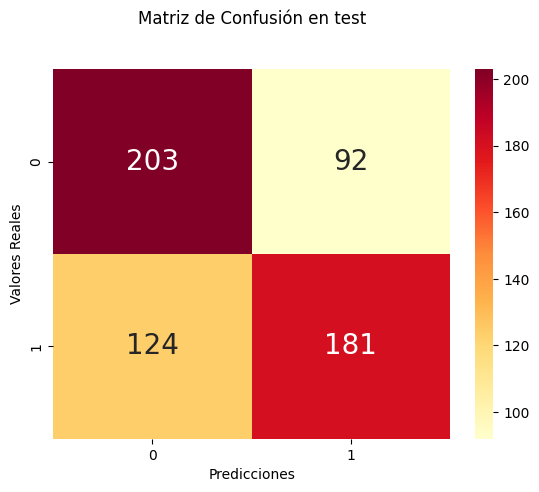

In [32]:
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

Vamos a calcular las métricas mencionadas anteriormente:

In [34]:
#accuracy score
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})

,metrics,values
0,accuracy,0.640000
1,recall,0.593443
2,specificidad,0.688136
3,precision,0.663004
4,f1,0.626298


| Métrica   | ¿Por qué son importantes las métricas? |
|---------- |---------|
| Recall       | Es clave porque queremos detectar las empresas que tendrían interes en un programa de eficiencia energética y minimizar los falsos negativos (FN). <br> Un FN significaría una organización que no recibiría información del programa, ya que no tiene interés  |
| F1-Score    | Si hay un desbalance en los datos (pocos casos positivos), ayuda a equilibrar precisión y recall.<br> Evita que un modelo con alta precisión pero bajo recall o viceversa sea engañoso.   |
| Precision    | Es importante, pero no tan prioritaria como el recall. <br>Un alto recall puede generar algunos falsos positivos (FP)  |
| Especificidad    | Puede ser útil, pero no es la métrica principal. <br>Si la especificidad es demasiado alta, podría significar que el modelo no detecta suficientes casos de organizaciones interesadas en programas de eficiencia energética.   |

Otra forma de revisar las métricas es con el *classification_report*

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       295
           1       0.66      0.59      0.63       305

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



**Conclusiones**:

- El modelo está clasificando bien al $64\%$ de los registros. No es un valor muy alto.

- El *recall* es $0.59$, es decir, de las organizaciones que tendrían interés en un programa de eficiencia energética , el algoritmo detecta correctamente al $59\%$ de ellas. El algoritmo no es tan bueno detectando este interés

- Se recomienda, tratar de optimizar los hiperparámetros o utilizar otro modelo.

# <FONT SIZE=5 COLOR="Purple"> 3. Predicción con el Modelo </FONT>

El objetivo de los modelos (cuando son eficientes) es poder hacer algunas predicciones

 | Variable             | Valor     | Descripción                                      |
| -------------------- | -------- | ------------------------------------------------ |
| Consumo_kWh          | 346.25 | Consumo mensual estimado de energía              |
| CostoEnergia_USD     | 228.20 | Costo de energía mensual                         |
| TempPromedio_C       | 28.17 | Temperatura promedio del sitio                   |
| HorasPico            | 3.49 | Horas diarias en tarifa pico                     |
| PotenciaMax_kW       | 84.25 | Máxima potencia requerida                        |
| EmisionesCO2_tn      | 2.12 | Emisiones asociadas                              |
| SectorIndustrial     | 1  | 1 = Industrial / 0 = Comercial                   |
| MantenimientoPrev    | 0  | Si ha tenido mantenimiento preventivo            |
| EdadEquipo_anios     | 15.44 | Antigüedad del equipamiento                      |
| **Interes (Target)** | ??  | Interés en programa de eficiencia energética |

346.25	228.20	28.17	3.49	84.25	2.12	1	0	15.44

In [36]:
X_new = [346.25,	228.20,	28.17,	3.49,	84.25,	2.12,	1,	0,	15.44	]

In [37]:
# usamos la función escalar.transform
X_new = np.array([[346.25,	228.20,	28.17,	3.49,	84.25,	2.12,	1,	0,	15.44	]])
X_test1 = escalar.transform(X_new)
X_test1

array([[-0.08053331, -0.34276276,  0.10729464, -0.43242162,  0.19470069,
        -0.49267525,  0.99288247, -0.98722446,  0.88401063]])

In [38]:
KNN.predict(X_test1)

array([1])

Veamos otros modelos

# <FONT SIZE=5 COLOR="Purple"> 4. Regresión Logística </FONT>



,metrics,values
0,accuracy,0.681667
1,recall,0.672131
2,specificidad,0.691525
3,precision,0.692568
4,f1,0.682196


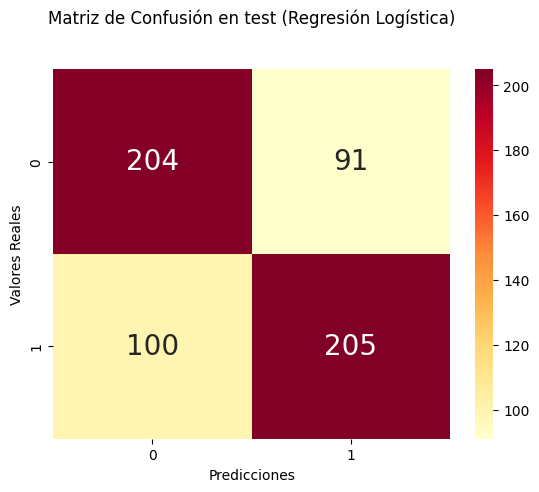

In [39]:
# 1. identificar las variables
y = energia["Interes"]
X = energia.drop("Interes", axis=1)

# 2. Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 123,
                                                    test_size = 0.3)

# 3. Escalar los datos
escalar = StandardScaler()
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

# 4. Definir el modelo de Regresión logística
modelo_reglog = LogisticRegression()

# 5. Entrenar el modelo
modelo_reglog.fit(X_train_s,y_train)

# 6. Predicciones y matriz de confusión
from sklearn import metrics
y_pred = modelo_reglog.predict(X_test_s)
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test (Regresión Logística)', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

# 7. Métricas
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})




# <FONT SIZE=5 COLOR="Purple"> 5. Árboles de Decisión </FONT>

,metrics,values
0,accuracy,0.636667
1,recall,0.619672
2,specificidad,0.654237
3,precision,0.649485
4,f1,0.634228


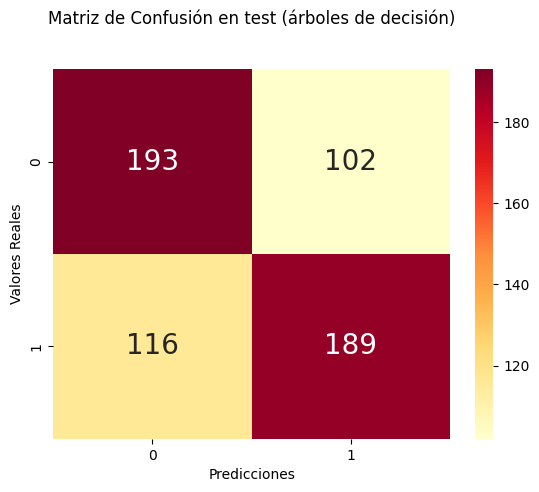

In [40]:
# 1. identificar las variables
y = energia["Interes"]
X = energia.drop("Interes", axis=1)

# 2. Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 123,
                                                    test_size = 0.3)

# 3. Escalar los datos  Comentarios
# escalar = StandardScaler()
# X_train_s = escalar.fit_transform(X_train)
# X_test_s = escalar.transform(X_test)

# 4. Definir el modelo de Arboles de Decisión
modelo_tree = DecisionTreeClassifier()

# 5. Entrenar el modelo
modelo_tree.fit(X_train,y_train)

# 6. Predicciones y matriz de confusión
from sklearn import metrics
y_pred = modelo_tree.predict(X_test)
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test (árboles de decisión)', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

# 7. Métricas
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})

# <FONT SIZE=5 COLOR="purple"> 6. Validación Cruzada </FONT>

La **validación cruzada**, o *cross validation*, es una técnica utilizada para evaluar los resultados obtenidos de un modelo de *machine learning* y garantizar que son independientes de los conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$).

- Cuando usamos la función de *sklearn*:

$$train\_test\_split(X, y, random\_state = 123 )$$

se extraen dos muestras aleatorias como conjuntos de entrenamiento y prueba. Luego se hace el proceso de entrenamiento y validación del modelo, teniendo como referencias las muestras seleccionadas. Sin embargo, una pregunta natural es:

**¿Qué sucede si tomo otras muestras como conjunto de entrenamiento y de prueba, obtendré los mismos resultados?**

Para responder lo anterior, debemos seleccionar varias muestras que correspondan a conjunto de entrenamiento y prueba diferentes y hacer el análisis del modelo. Precisamente, esto es lo que hace el proceso de validación cruzada.

Se divide el conjunto de datos en $n$ partes, de las cuales se toma una como conjunto de *prueba* y las otras $n-1$ como conjunto de entrenamiento. Y vamos rotando el conjunto de prueba, tal y como se muestra en la siguiente figura.

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/validation1.png?raw=true?" alt="centered image" width="600" height="350"></center>

<br>

In [41]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline        import make_pipeline

pipeline = make_pipeline(StandardScaler(), KNN)

#kfold_validacion = KFold(10)                              # divide los datos en 10 pliegues.
resultados = cross_val_score(pipeline,                     # modelo aplicado
                             X,                            # conjunto de predictores
                             y,                            # variable de respuesta
                             cv = 10,                       # número de divisiones en cross-validation.
                             scoring = "accuracy")         # se puede escoger la métrica.
print(resultados)                                          # para ver la variable resultados.
resultados.mean()

[0.67  0.605 0.66  0.74  0.68  0.705 0.635 0.68  0.58  0.66 ]


np.float64(0.6615)

Obtenemos en promedio 0.74 de *Accuracy*

# <FONT SIZE=5 COLOR="purple"> 7. Ejercicio en clase </FONT>



Este archivo tiene datos de tarjetas de crédito que se componen de una variable objetivo que es de naturaleza binaria (1 si se aprueba la solicitud de tarjeta de crédito, 0 si no) y algunas variables independientes sobre la demografía y el historial crediticio de los titulares de tarjetas de crédito.

Los datos para este trabajo se tomaron y modificaron de *kaggle* en la siguiente *url*.

https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?select=AER_credit_card_data.csv

Se anexan los datos como ***datos_credito*** y este trabajo se va a desarrollar con este conjunto.

```python
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/datos_credito.csv"
```

Cada fila representa una solicitud de tarjeta de crédito, cada columna contiene los atributos del solicitante:

- *tarjeta*: variable ficticia, 1 si se aprueba la solicitud de tarjeta de crédito, 0 si no

- *informes*: número de informes despectivos importantes.

- *edad*: Edad n años más doceavos de un año.

- *ingreso*: ingreso anual (dividido por 10,000).

- *participación*: relación entre el gasto mensual de la tarjeta de crédito y el ingreso anual.

- *gasto*: gasto medio mensual con tarjeta de crédito.

- *propietario*: 1 si es dueño de su casa, 0 si alquila.

- *selfemp*: 1 si es autónomo, 0 si no.

- *dependientes*: 1 + número de dependientes.

- *meses*: Meses viviendo en la dirección actual.

- *majorcards*: número de las principales tarjetas de crédito que se tienen.

- activo: Número de cuentas de crédito activas.

Según Greene (2003, p. 952) los dependientes equivalen a 1 + número de dependientes. Eso se describe arriba. Los autores del paquete “AER” en R creen que es el número de dependientes.

Algunas precisiones sobre las variables

- *Los informes promedio* (es decir, el número promedio de informes despectivos importantes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El ingreso promedio* (es decir, el ingreso anual promedio dividido por 10,000) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *La participación promedio* (es decir, la relación promedio entre el gasto mensual de la tarjeta de crédito y el ingreso anual) de los solicitantes que fueron aprobados es más alta que la de los solicitantes que no fueron aprobados.

- *El gasto promedio* (es decir, el gasto mensual promedio con tarjeta de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *El promedio de dependientes*(es decir, el número promedio de dependientes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El promedio de tarjetas principales* (es decir, el número promedio de las principales tarjetas de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

In [42]:
# cargar los datos que están la dirección del github
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/datos_credito.csv"
credito = pd.read_csv(url, na_values=[" "])

In [ ]:
credito